In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


In [119]:
enfermedades = pd.read_excel('archivos/CIE.xlsx')
new_df = pd.read_csv('archivos/NewDataAll.csv', low_memory= False)

new_df.head(5)


,ID,depreg,mupreg,mesreg,añoreg,depocu,mupocu,sexo,diaocu,mesocu,...,ecidif,dnadif,mnadif,nacdif,dredif,mredif,caudef,asist,ocur,cerdef
0,0,5,505,1,9,5,505,1,2,1,...,1,1,101,0,1,101,Y214,1,3,1
1,1,1,101,9,9,1,101,1,27,9,...,1,1,101,0,1,101,X919,4,3,1
2,2,22,2206,9,9,22,2206,2,23,8,...,1,1,101,0,1,101,X959,4,3,2
3,3,2,201,12,9,2,201,1,5,12,...,1,1,101,0,1,101,V899,4,3,1
4,4,1,101,5,9,1,101,2,7,5,...,2,1,101,0,1,101,X709,4,3,1


In [120]:
# Preprocesar los datos
new_df['caudef']
enfermedades2 = enfermedades.copy()
enfermedades2.loc[enfermedades2['CAUSA'].str.len() == 3, 'CAUSA'] = enfermedades2.loc[enfermedades2['CAUSA'].str.len() == 3, 'CAUSA'] + "X"

new_df2 = pd.merge(new_df, enfermedades2, left_on='caudef', right_on='CAUSA', how='left')
new_df2 = new_df2.dropna()
causas_infecciones = new_df2.loc[new_df2["DESCRIP"].str.contains("Infecciones|infecciones|infeccion|Infección|Infeccion|infección")]
causas_vih = new_df2.loc[new_df2["DESCRIP"].str.contains("VIH|vih|SIDA")]


In [121]:
# Filtrar las características y la variable objetivo
new_df2['VIH'] = 0
indices_vih = new_df2[new_df2['DESCRIP'].str.contains("VIH|vih|SIDA")].index
new_df2.loc[indices_vih, 'VIH'] = 1
print(new_df2)
# Contar los valores en la columna 'VIH'
conteo_vih = new_df2['VIH'].value_counts()
conteo_anio = new_df2['añoreg'].value_counts()

# Imprimir el conteo
print(conteo_vih)
print(conteo_anio)

           ID  depreg  mupreg  mesreg  añoreg  depocu  mupocu  sexo  diaocu  \
0           0       5     505       1       9       5     505     1       2   
1           1       1     101       9       9       1     101     1      27   
2           2      22    2206       9       9      22    2206     2      23   
3           3       2     201      12       9       2     201     1       5   
4           4       1     101       5       9       1     101     2       7   
...       ...     ...     ...     ...     ...     ...     ...   ...     ...   
953745  95995       5     501      12    2020       5     503     1      27   
953746  95996       9     901       4    2020       9     901     1       7   
953747  95997      10    1001      11    2020      10    1001     1      22   
953749  95999       9     901       2    2020       9     901     1      23   
953750  96000       1     101       1    2020       1     101     1      22   

        mesocu  ...  nacdif  dredif  mredif  caudef

In [122]:
X = new_df2[['añoreg']]
y = new_df2['VIH']

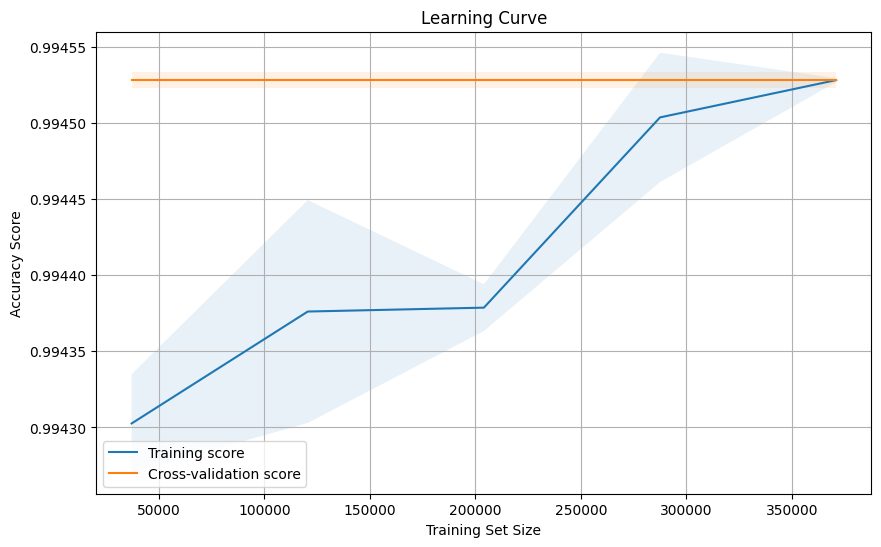

LogisticRegression()

In [123]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=69)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

# Calcular las medias y desviaciones estándar de los puntajes
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Rellenar la región entre ± una desviación estándar del puntaje de entrenamiento
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
# Rellenar la región entre ± una desviación estándar del puntaje de validación cruzada
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Entrenar el modelo
model.fit(X_train, y_train)



In [124]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Calcular la precisión, sensibilidad y especificidad
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Calcular la sensibilidad y especificidad
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Imprimir los resultados
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Recall:", recall)
print("F1 Score:", f1)
# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(confusion)

Accuracy: 0.9945539335217681
Sensitivity: 0.0
Specificity: 1.0
Recall: 0.0
F1 Score: 0.0
Matriz de Confusión:
[[461295      0]
 [  2526      0]]
